In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator
from plots.mpltoolkit import load_mpl_presets, named_colors, mpl_loc, fancy_legend
import numpy as np
import sys
sys.path.append("..")
from src.mzr import am2013, zahid2014
load_mpl_presets()
print(sys.version_info)

/Users/jamesjohnson/Work/Research/VICErepos/VICE/vice/__init__.py:138: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


sys.version_info(major=3, minor=10, micro=4, releaselevel='final', serial=0)


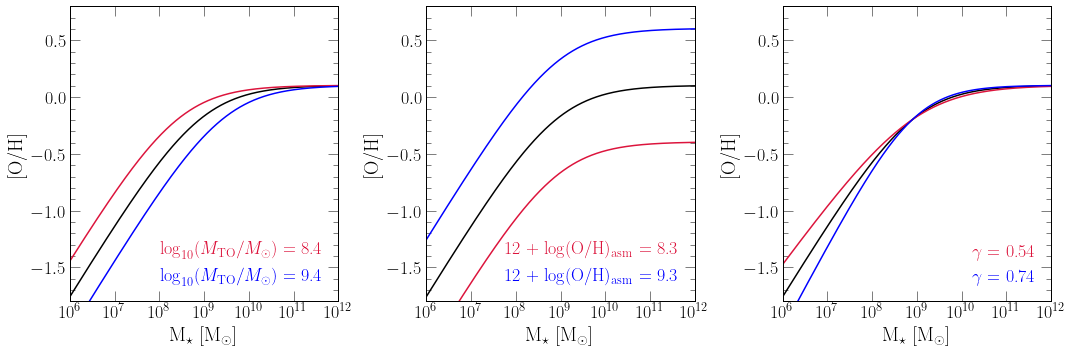

In [10]:
fig = plt.figure(figsize = (15, 5))
axes = []
for i in range(3):
    axes.append(fig.add_subplot(131 + i))
    axes[i].set_xlabel(r"M$_\star$ [M$_\odot$]")
    axes[i].set_ylabel("[O/H]")
    axes[i].set_xscale("log")
    axes[i].set_xlim([1.e6, 1.e12])
    axes[i].set_xticks([10**_ for _ in range(6, 13)])
    axes[i].set_ylim([-1.8, 0.8])

xvals = np.logspace(6, 12, 1000)
yvals = [am2013(_) for _ in xvals]
for i in range(3): axes[i].plot(xvals, yvals, c = named_colors()["black"])
    
logmto = [8.4, 9.4]
colors = ["crimson", "blue"]
default_logmto = am2013.logmto
for i in range(len(logmto)):
    am2013.logmto = logmto[i]
    yvals = [am2013(_) for _ in xvals]
    axes[0].plot(xvals, yvals, c = named_colors()[colors[i]],
        label = r"$\log_{10}(M_\text{TO}/M_\odot)$ = %g" % (logmto[i]))
am2013.logmto = default_logmto
legend_kwargs = {
    "loc": mpl_loc("lower right"),
    "ncol": 1,
    "handlelength": 0
}
leg = axes[0].legend(**legend_kwargs)
fancy_legend(leg, colors)

logplus12oh_asm = [8.3, 9.3]
default_logplus12oh_asm = am2013.logplus12oh_asm
for i in range(len(logplus12oh_asm)):
    am2013.logplus12oh_asm = logplus12oh_asm[i]
    yvals = [am2013(_) for _ in xvals]
    axes[1].plot(xvals, yvals, c = named_colors()[colors[i]],
        label = r"12 + $\log$(O/H)$_\text{asm}$ = %g" % (logplus12oh_asm[i]))
am2013.logplus12oh_asm = default_logplus12oh_asm
leg = axes[1].legend(**legend_kwargs)
fancy_legend(leg, colors)

gamma = [0.54, 0.74]
default_gamma = am2013.gamma
for i in range(len(gamma)):
    am2013.gamma = gamma[i]
    yvals = [am2013(_) for _ in xvals]
    axes[2].plot(xvals, yvals, c = named_colors()[colors[i]],
        label = r"$\gamma$ = %.2f" % (gamma[i]))
am2013.gamma = default_gamma
leg = axes[2].legend(**legend_kwargs)
fancy_legend(leg, colors)

plt.tight_layout()
plt.show()

# ax = fig.add_subplot(111)
# ax.set_xscale("log")
# ax.set_xlabel(r"$M_\star$ [M$_\odot$]")
# ax.set_ylabel("[O/H]")
# ax.set_xlim([1.e6, 1.e12])
# ax.set_xticks([10**_ for _ in range(6, 13)])

# xvals = np.logspace(6, 12, 1000)
# yvals = [am2013(_) for _ in xvals]

# ax.plot(xvals, yvals, c = named_colors()["black"])
# plt.tight_layout()
# plt.show()

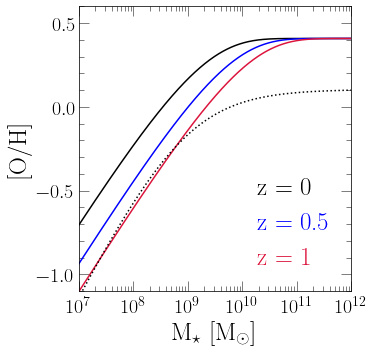

In [4]:
fig = plt.figure(figsize = (5.3, 5))
ax = fig.add_subplot(111)
ax.set_xlabel(r"M$_\star$ [M$_\odot$]", fontsize = 25)
ax.set_ylabel("[O/H]", fontsize = 25)
ax.set_xscale("log")
ax.set_xlim([1e7, 1e12])
ax.set_ylim([-1.1, 0.6])
ax.set_yticks([-1, -0.5, 0, 0.5])
ax.set_xticks([10**_ for _ in range(7, 13)], which = "major")
minorticks = []
for i in range(7, 12):
    for j in range(2, 10):
        minorticks.append(j * 10**i)
ax.xaxis.set_minor_locator(FixedLocator(minorticks))
ax.tick_params(labelsize = 20)
ax.tick_params(axis = "x", pad = 7)

# redshifts = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
# colors = {
#     0: "black",
#     0.2: "darkviolet",
#     0.4: "blue",
#     0.6: "green",
#     0.8: "gold",
#     1.0: "crimson"
# }
redshifts = [0, 0.5, 1]
colors = {
    0: "black",
    0.5: "blue",
    1: "crimson"
}
masses = np.logspace(7, 12, 1001)
for z in redshifts:
    kwargs = {
        "c": named_colors()[colors[z]],
        "label": "z = %g" % (z)
    }
    yvals = [zahid2014(_, z) for _ in masses]
    ax.plot(masses, yvals, **kwargs)
kwargs = {
    "c": named_colors()["black"],
    "linestyle": ":"
}
yvals = [am2013(_) for _ in masses]
ax.plot(masses, yvals, **kwargs)
    
kwargs = {
    "loc": mpl_loc("lower right"),
    "handlelength": 0,
    "fontsize": 25,
    "ncol": 1,
    "columnspacing": 1
}
leg = ax.legend(**kwargs)
fancy_legend(leg, [colors[z] for z in redshifts])

plt.tight_layout()
for ext in ["pdf", "jpeg"]:
    kwargs = {}
    if ext == "jpeg": kwargs["dpi"] = 200
    plt.savefig("../paper/mzr.%s" % (ext), **kwargs)
plt.show()